# Minimal example with TensorFlow 2.0
In this notebook we will recreate our machine learning algorithm using TF 2.0.

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [3]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [4]:
training_data = np.load('TF_intro.npz')

In [5]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                 )
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 31.8483
Epoch 2/100
1000/1000 - 0s - loss: 1.1934
Epoch 3/100
1000/1000 - 0s - loss: 0.4559
Epoch 4/100
1000/1000 - 0s - loss: 0.4044
Epoch 5/100
1000/1000 - 0s - loss: 0.3861
Epoch 6/100
1000/1000 - 0s - loss: 0.3710
Epoch 7/100
1000/1000 - 0s - loss: 0.3995
Epoch 8/100
1000/1000 - 0s - loss: 0.3953
Epoch 9/100
1000/1000 - 0s - loss: 0.3747
Epoch 10/100
1000/1000 - 0s - loss: 0.3592
Epoch 11/100
1000/1000 - 0s - loss: 0.3667
Epoch 12/100
1000/1000 - 0s - loss: 0.3525
Epoch 13/100
1000/1000 - 0s - loss: 0.3542
Epoch 14/100
1000/1000 - 0s - loss: 0.3707
Epoch 15/100
1000/1000 - 0s - loss: 0.3788
Epoch 16/100
1000/1000 - 0s - loss: 0.3734
Epoch 17/100
1000/1000 - 0s - loss: 0.3881
Epoch 18/100
1000/1000 - 0s - loss: 0.3835
Epoch 19/100
1000/1000 - 0s - loss: 0.3516
Epoch 20/100
1000/1000 - 0s - loss: 0.3940
Epoch 21/100
1000/1000 - 0s - loss: 0.3957
Epoch 22/100
1000/1000 - 0s - loss: 0.3829
Epoch 23/100
1000/1000 - 0s - loss: 0.43

## Extract the weights and bias

In [8]:
model.layers[0].get_weights()

[array([[ 2.045309 ],
        [-2.9888365]], dtype=float32), array([5.0100904], dtype=float32)]

In [9]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.045309 ],
       [-2.9888365]], dtype=float32)

In [10]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0100904], dtype=float32)

## Extract the outputs (make predictions)

In [13]:
model.predict_on_batch(training_data['inputs']).numpy().round(1)

array([[  3.2],
       [ -5.6],
       [-31.2],
       [-32.3],
       [ 42.4],
       [ 14.2],
       [ 12.9],
       [ -6.2],
       [ 34.7],
       [ 30.4],
       [-37.5],
       [  1.7],
       [ 20.1],
       [-12.1],
       [ 41.1],
       [-17.1],
       [-28. ],
       [ 14.5],
       [ 26.3],
       [ 22.7],
       [ -0.4],
       [-18.3],
       [ 37.8],
       [ 20.8],
       [  8.5],
       [  3.6],
       [-14.6],
       [ 31. ],
       [ -5.1],
       [  3.4],
       [ 10.9],
       [-11.6],
       [ 20.6],
       [  0. ],
       [  1. ],
       [-24.3],
       [ 27.1],
       [-14.8],
       [ -6.1],
       [  0.4],
       [ -3.1],
       [  4.2],
       [ 20.2],
       [ 15.9],
       [-20.3],
       [  4.7],
       [-30. ],
       [ 14.3],
       [ 15.9],
       [ 13.3],
       [ 30.2],
       [  7.3],
       [ 11.9],
       [-16.2],
       [ -2.6],
       [-32.7],
       [ -2.4],
       [-31.6],
       [  5.8],
       [-15.2],
       [ 33.9],
       [ -0. ],
       [

In [14]:
training_data['targets'].round(1)

array([[  2.5],
       [ -5.4],
       [-30.4],
       [-32.8],
       [ 43.1],
       [ 14.6],
       [ 13. ],
       [ -7. ],
       [ 34.2],
       [ 30.4],
       [-37. ],
       [  1.3],
       [ 20.3],
       [-13.3],
       [ 41.4],
       [-18.3],
       [-26.9],
       [ 14.4],
       [ 26.4],
       [ 21.3],
       [ -0.1],
       [-17.8],
       [ 37.9],
       [ 19.6],
       [  8.5],
       [  3.7],
       [-14.3],
       [ 30.1],
       [ -5.8],
       [  4.1],
       [ 10.6],
       [-10.7],
       [ 19.5],
       [ -0.6],
       [  1.4],
       [-23.8],
       [ 26.7],
       [-14.3],
       [ -5.4],
       [ -0.1],
       [ -3.6],
       [  3.4],
       [ 20.3],
       [ 16.7],
       [-20.4],
       [  3.7],
       [-29.9],
       [ 14.1],
       [ 16.6],
       [ 13.9],
       [ 30. ],
       [  6.5],
       [ 12.1],
       [-16.9],
       [ -2.4],
       [-32.5],
       [ -1.6],
       [-31.3],
       [  6.6],
       [-15.7],
       [ 33.3],
       [ -0.9],
       [

## Plotting the data

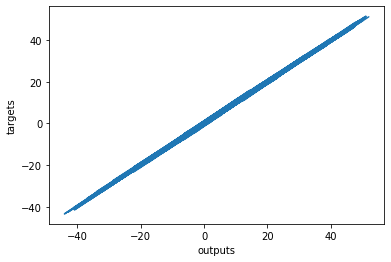

In [15]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()